In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Testing with Out-of-Sample Data 

Up to this point, we’ve created a model that is seemingly 98% accurate at predicting the testing dataset that we’ve generated. These generated data are created based on a very clear set of rules outlined in the ​spiral_data​ function. The expectation is that a well-trained neural network can learn a representation of these rules and use this representation to predict classes of additional generated data. Imagine that you’ve trained a neural network model to read license plates on vehicles. The expectation for a well-trained model, in this case, would be that it could see future examples of license plates and still accurately predict them (a prediction, in this case, would be correctly identifying the characters on the license plate). The complexity of neural networks is their biggest issue and strength. By having a massive amount of tunable parameters, they are exceptional at “fitting” to data. This is a gift, a curse,
and something that we must constantly try to balance. With enough neurons, a model can easily memorize a dataset; however, it can not generalize the data with too few. This is one reason why we do not simply solve problems with neural networks by using the most neurons or biggest models possible. At the moment, we’re uncertain whether our latest neural network’s 98% accuracy is due to learning to meaningfully represent the underlying data-generation function or instead ​overfitting the data. So far, we have only tuned hyper-parameters to achieve the highest possible accuracy on the training data, and have never tried to challenge the model with the previously unseen data. Overfitting​ is effectively just memorizing the data without any understanding of it. An overfit model will do very well predicting the data that it has already seen, but often significantly worse on unseen data.
and something that we must constantly try to balance. With enough neurons, a model can easily memorize a dataset; however, it can not generalize the data with too few. This is one reason why we do not simply solve problems with neural networks by using the most neurons or biggest models possible. At the moment, we’re uncertain whether our latest neural network’s 98% accuracy is due to learning to meaningfully represent the underlying data-generation function or instead ​overfitting the data. So far, we have only tuned hyper-parameters to achieve the highest possible accuracy on the training data, and have never tried to challenge the model with the previously unseen data. Overfitting​ is effectively just memorizing the data without any understanding of it. An overfit model will do very well predicting the data that it has already seen, but often significantly worse on unseen data.

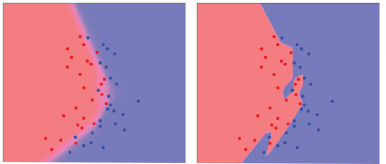
Figure 1:​ Good generalization (left) and overfitting (right) on the data

The left image shows an example of generalization. In this example, the model learned to separate red and blue data points, even if some of them will be predicted incorrectly. One reason for this might be the data that contains some “confusing” samples. When you look at the image, you can see that, for example, some of these blue dots might not be there, which would raise the data quality and make it easier to fit. A good dataset is one of the biggest challenges with neural networks. The image on the right shows the model that memorized the data, fitting them perfectly and ruining generalization.


Without knowing if a model overfits the training data, we cannot trust the model’s results. For this reason, it’s essential to have both ​training ​and ​testing​ ​data ​as separate sets for different purposes. Training​ data should only be used to train a model. The ​testing, ​or ​out-of-sample​ data, should only be used to validate a model’s performance after training (we are using the testing data during training later in this chapter for demonstration purposes only). The idea is that some data are reserved and withheld from the training data for testing the model’s performance. In many cases, one can take a random sampling of available data to train with and make the remaining data the testing dataset. You still need to be very careful about information leaking through. One common area where this can be problematic is in time-series data. Consider a scenario where you have data from sensors collected every second. You might have millions of observations collected, and randomly selecting your data for the ​testing​ data might result in samples in your ​testing​ dataset that are only a second in time apart from your ​training​ data, thus are very similar. This means overfitting can spill into your testing data, and the model can achieve good results on both the training and the testing data, which won’t mean it generalized well. Randomly allocating time-series data as testing data may be very similar to training data. Both datasets must differ enough to prove the model’s ability to generalize. In time-series data, a better approach is to take multiple slices of your data, entire blocks of time, and reserve those for testing. Other biases like these can sneak into your testing dataset, and this is something you must be vigilant about, carefully considering if data leakage has occurred and how to truly isolate out-of-sample​ data. In our case, we can use our data-generating function to create new data that will serve as out-of-sample/testing data:

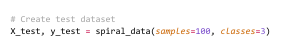
Given what was just said about overfitting, it may look wrong to only generate more data, as the testing data could look similar to the training data. Intuition and experience are both important to spot potential issues with out-of-sample data. By looking at the image representation of the data, we can see that another set of data generated by the same function will be adequate. This is just about as safe as it gets for out-of-sample data as the classes are partially mixing at the edges (also, we’re quite literally using the “underlying function” to make more data).
With these data, we evaluate the model’s performance by doing a forward pass and calculating loss and accuracy the same as before:


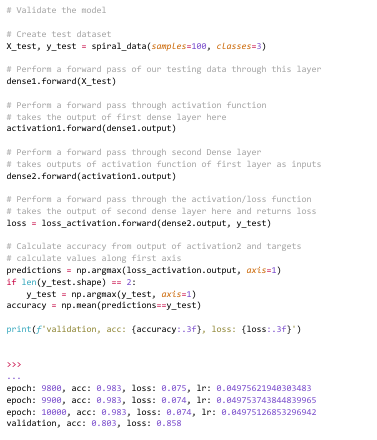

While 80.3% accuracy and a loss of ​0.858​ is not terrible, this contrasts with our training data that achieved 98% accuracy and a loss of 0.074. This is evidence of over-fitting. In the following image, the training data is dimmed, and validation data points are shown on top of it at the same positions for both the well-generalized (on the left) and overfitted (on the right) models.

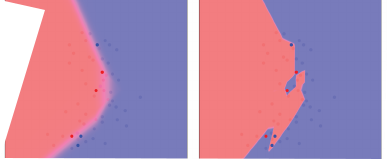


We can recognize overfitting when testing data results begin to diverge in trend from training data. It will usually be the case that performance against your training data is better, but having training loss differ from test performance by over 10% approximately is a common sign of serious overfitting from our anecdotal experience. Ideally, both datasets would have identical performance. Even a small difference means that the model did not correctly predict some testing samples, implying slight overfitting of training data. In most cases, modest overfitting is not a serious problem, but something we hope to minimize.
Let’s see the training process of this model once again, but with the training data, training accuracy, and loss plots dimmed. We add the test data and its loss and accuracy plotted on top of the training counterparts to show this model overfitting:

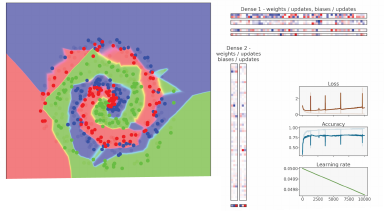
Figure 03:​ Prediction issues on the testing data — overfitted model.
This is a classic example of overfitting — the validation loss falls down, then starts rising once the model starts overfitting. The dots representing classes in the validation data can be spotted over areas of effect of other classes. Previously, we weren’t aware that this was happening; we were just seeing very good training results. That’s why we usually should use the testing data to test the model after training. The model is currently tuned to achieve the best possible score on the training data, and most likely the learning rate is too high, there are too many training epochs, or the model is too big. There are other possible causes and ways to fix this, but this is the topic of the following chapters. In general, the goal is to have the testing loss identical to the training loss, even if that means higher loss and lower accuracy on the training data. Similar performance on both datasets means that model generalized instead of overfitting on the training data.
As mentioned, one option to prevent overfitting is to change the model’s size. If a model is not learning at all, one solution might be to try a larger model. If your model is learning, but there’s a divergence between the training and testing data, it could mean that you should try a smaller model. One general rule to follow when selecting initial model hyperparameters is to find the smallest model possible that still learns. Other possible ways to avoid overfitting are regularization techniques we’ll discuss in chapter 14, and the ​Dropout​ layer explained in chapter 15. Often the divergence of the training and testing data can take a long time to occur. The process of trying different model settings is called hyperparameter searching. Initially, you can very quickly (usually within minutes) try different settings (e.g., layer sizes) to see if the models are learning ​something​. If they are, train the models fully — or at least significantly longer — and compare results to pick the best set of hyperparameters. Another possibility is to create a list of different hyperparameter sets and train the model in a loop using each of those sets at a time to pick the best set at the end. The reasoning here is that the fewer neurons you have, the less chance you have that the model is memorizing the data. Fewer neurons can mean it’s easier for a neural network to generalize (actually learn the meaning of the data) compared to memorizing the data. With enough neurons, it’s easier for a neural network to memorize the data. Remember that the neural network wants to decrease training loss and follows the path of least resistance to meet that objective. Our job as the programmer is to make the path to generalization the easiest path. This can often mean our job is actually to make the path to lowering loss for the model more challenging!



